<img src="header.png" alt="Logo" >


# **Lets Build a more complex Project Step by step**




<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 1 : Bulding a simple ChatBot as we did before (Without memory)</h2>

</div>


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1 : Bulding Graph</h3>
</div>


In [2]:
import getpass
import os

def _set_env(var: str):
    "we use this function to set the enviromental variables dynamically"
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


In [9]:
_set_env("OpenAi_Key")

In [10]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

# Step 1 : Define Model we are going to use from openAi
llm = ChatOpenAI(model="gpt-4o", api_key=os.environ.get("OpenAi_Key"))

In [9]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
# this is a method that can be used instead of using the operator.add (to share data among other nodes not other calls to the model)
from langgraph.graph.message import add_messages

# Step 1 : Define State Class Schema
class State(TypedDict):
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]
 
# Step 2 : Building State Graph   
builder = StateGraph(State) 

# Step 3 : Define Function (which is going to be mapped to a node)
def chatbot(state: State):
    # its simply going to return llm response
    return {"messages": [llm.invoke(state["messages"])]}

# Step 4 : Map nodes
builder.add_node("chatbot", chatbot)

# Step 5 : Draw graph
builder.add_edge(START, "chatbot")

builder.add_edge("chatbot", END)

# Step 6 : Compile graph
graph = builder.compile()   



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2 : Testing Manually</h3>
</div>

In [10]:
# Test Our Graph
result = graph.invoke({"messages":["my name is ahmed"]})
# The first message we sent 
print(result["messages"][0].content)
# The sec. message which is response of the model 
print(result["messages"][1].content)

my name is ahmed
Hello, Ahmed! How can I assist you today?


In [11]:
# Test Our Graph
result = graph.invoke({"messages":["what's my name ?"]})
# The first message we sent 
print(result["messages"][0].content)
# The sec. message which is response of the model 
print(result["messages"][1].content) 

what's my name ?
I'm sorry, but I can't determine your name based on the information provided.






<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 : Graph Visualization</h3>
</div>

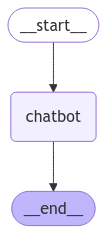

In [12]:
# Lets plot our graph
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass





<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 4: ChatBot Loop</h3>
</div>

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        result = graph.invoke({"messages":[("user",user_input)]})
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("user" + user_input)
        result = graph.invoke({"messages":[("user",user_input)]})
        break
    print(result["messages"][1].content)    

Hello! How can I assist you today?
I'm just a program, so I don't have feelings, but I'm here to help you! How can I assist you today?
Hello, Mohab! How can I assist you today?
Hello, Mohab! How can I assist you today?
No, I don't know your name. You haven't shared it with me.
Hello! How can I assist you today?
Hello! How can I assist you today?



<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 2: Enhancing the Chatbot with Tools (Without memory)</h2>

</div>




<p class="styled-heading"><strong>To address queries that our chatbot cannot answer due to its limited knowledge, we will integrate a web search tool. This addition will enable the chatbot to retrieve relevant information from external sources, improving its ability to provide accurate and comprehensive responses.</strong></p>

<style>
  /* Styling for the custom heading */
  .styled-heading {
    font-size: 20px;
    font-weight: 600;
    color: #a9c0d8;  /* Lighter text color for dark mode */
    margin-top: 20px;
    margin-bottom: 10px;
    padding-left: 20px;
    position: relative;
  }

  .styled-heading strong {
    color: #ffcc00;  /* Bright yellow for emphasis */
  }

  .styled-heading:before {
    content: '•';
    position: absolute;
    left: 0;
    top: 50%;
    transform: translateY(-50%);
    color: #ffcc00;  /* Match bullet color with the strong tag */
    font-size: 18px;
  }
</style>





<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1:using TAVILY API with LangGraph</h3>
</div>

In [ ]:
%pip install -U tavily-python langchain_community
_set_env("TAVILY_API_KEY") 

In [4]:
from langchain_community.tools.tavily_search import TavilySearchResults
# importing and using tool from langchain community
tool = TavilySearchResults(max_results=2)
# Example how the tool is used
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [19]:
# keep in mind that model knows when to use the tool based on the name and description provided for tool itself after binding it with LLM Model
print("tool name ->" , tool.name)
print("tool description ->" , tool.description)

tool name -> tavily_search_results_json
tool description -> A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.





<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2:Creating ChatBot using Tools from Scratch</h3>
</div>


In [20]:
from typing import Annotated,TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_community.tools.tavily_search import TavilySearchResults


# Step 1 : Identifying State
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Step 2 : bulding state
builder = StateGraph(State)

# Step 3 : Identify tool we are going to use
tool = TavilySearchResults(max_results=2)
tools = [tool]

# Step 4 : LLM is binded with the tools (it doesnt mean the model is gonna use the tool it means the model is gonna say we need to use it)
llm_with_tools = llm.bind_tools(tools)

# Step 5 : function which will be added as a node
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}





<p class="styled-heading"><strong>Creating Tool node Manullay</strong></p>

<style>
  /* Styling for the custom heading */
  .styled-heading {
    font-size: 20px;
    font-weight: 600;
    color: #a9c0d8;  /* Lighter text color for dark mode */
    margin-top: 20px;
    margin-bottom: 10px;
    padding-left: 20px;
    position: relative;
  }

  .styled-heading strong {
    color: #ffcc00;  /* Bright yellow for emphasis */
  }

  .styled-heading:before {
    content: '•';
    position: absolute;
    left: 0;
    top: 50%;
    transform: translateY(-50%);
    color: #ffcc00;  /* Match bullet color with the strong tag */
    font-size: 18px;
  }
</style>


In [21]:
import json
from langchain_core.messages import ToolMessage

# Step 6 : Bulding Tool node from scratch (in practise we dont use it (as it's implemented) Here just in case you want to make your own ToolNode)
# Creating Tool Node from scratch (Which excutes the tool manually)
class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""
    
    # Iterates on every tool in list stores them based as a dic based on their names { key -> tool.name : value -> tool itself}
    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    # every cycle function is excuted
    def __call__(self, inputs: dict):
        # take the latest message sent
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        # Tool_calls will be a section inside the message of last response (it may include multiple tool calls thats why its a list)
        for tool_call in message.tool_calls:
            # calling the tool
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            
            # return format for the output for each tool
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}
    
tool_node = BasicToolNode(tools=[tool])

# Step 7 : Mapping the nodes to functions
builder.add_node("chatbot", chatbot)
builder.add_node("tools", tool_node)




<p class="styled-heading"><strong>Creating Route_tools which helps conditional edge to detrime which route to move to</strong></p>

<style>
  /* Styling for the custom heading */
  .styled-heading {
    font-size: 20px;
    font-weight: 600;
    color: #a9c0d8;  /* Lighter text color for dark mode */
    margin-top: 20px;
    margin-bottom: 10px;
    padding-left: 20px;
    position: relative;
  }

  .styled-heading strong {
    color: #ffcc00;  /* Bright yellow for emphasis */
  }

  .styled-heading:before {
    content: '•';
    position: absolute;
    left: 0;
    top: 50%;
    transform: translateY(-50%);
    color: #ffcc00;  /* Match bullet color with the strong tag */
    font-size: 18px;
  }
</style>


In [22]:
# Step 8 : Route_tools (determines the route which Chatbot Node is going to follow) Manually
def route_tools(state: State):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

#  Step 9 : Connecting Edges
builder.add_edge(START, "chatbot")

# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", END: END},
)

builder.add_edge("tools", "chatbot")

graph = builder.compile()



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3: Visualization of our graph</h3>
</div>


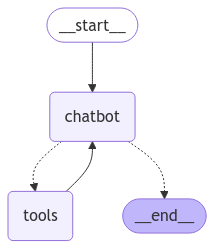

In [23]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 4: Manually testing our graph</h3>
</div>


In [24]:
result = graph.invoke({"messages":"What do you know about LangGraph? provide answer as bullet points from the internet"})

In [25]:
# Thats the first state stored (user query as an input for Chatbot part before going to the next state)
result["messages"][0]

HumanMessage(content='What do you know about LangGraph? provide answer as bullet points from the internet', additional_kwargs={}, response_metadata={}, id='95e76ecb-11ad-4333-9846-8c810752cd7c')

In [26]:
# Thats the second state stored (The output from the chatbot where content is empty which means the model knew it shouldn't answer and went send back in argument field function which it needs to call)
result["messages"][1]

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lFkycBwxjCYNqaAOVbjOevao', 'function': {'arguments': '{"query":"LangGraph"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 95, 'total_tokens': 114, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a79d8dac1f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-260b2f2e-be42-45cc-bd29-10db1ae309c1-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph'}, 'id': 'call_lFkycBwxjCYNqaAOVbjOevao', 'type': 'tool_call'}], usage_metadata={'input_tokens': 95, 'output_tokens': 19, 'total_tokens': 114, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_de

In [27]:
# The third state which is the answer output of the tool and this is going to be send back to gpt
result["messages"][2]

ToolMessage(content='[{"url": "https://langchain-ai.github.io/langgraph/", "content": "LangGraph is a low-level framework that allows you to create stateful, multi-actor applications with LLMs, using cycles, controllability, and persistence. Learn how to use LangGraph with LangChain, LangSmith, and Anthropic tools to build agent and multi-agent workflows."}, {"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building and scaling agentic applications with LangChain Platform. It supports diverse control flows, human-agent collaboration, streaming, and deployment options for complex tasks."}]', name='tavily_search_results_json', id='e0110c80-5fd2-4792-9eb6-81bf107ffade', tool_call_id='call_lFkycBwxjCYNqaAOVbjOevao')

In [28]:
# The output of the gpt after the previous response was given to it
result["messages"][3]

AIMessage(content="Here are some bullet points about LangGraph based on the information available online:\n\n- LangGraph is a low-level framework designed to facilitate the creation of stateful, multi-actor applications using language models (LLMs).\n- It provides functionalities such as cycles, controllability, and persistence to enhance application development.\n- LangGraph can be integrated with LangChain, LangSmith, and Anthropic tools to build agent and multi-agent workflows.\n- It supports diverse control flows and human-agent collaboration, making it versatile for complex task management.\n- The framework allows for streaming and deployment options, enabling scalable agentic application development.\n\nFor more detailed information, you can visit LangGraph's [official page](https://langchain-ai.github.io/langgraph/) or [LangChain's website](https://www.langchain.com/langgraph).", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 164, 'p

<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 3 : Adding Memory to Chatbot</h2>

</div>



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1 : Bulding Graph</h3>
</div>

In [29]:
from typing import Annotated
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

# Step 1 : Adding Memory Saver
memory = MemorySaver()

# All actually same steps we did before
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

search_tool = TavilySearchResults(max_results=2)
tools = [search_tool]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges("chatbot",tools_condition)
graph_builder.add_edge("tools", "chatbot")

graph = graph_builder.compile(checkpointer=memory)


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2 : Manual Testing ChatBot</h3>
</div>


In [30]:
config = {"configurable": {"thread_id": "1"}}

result = graph.invoke({"messages":[("user","Do you know my name")]},config)

In [31]:
print(result["messages"][1])

content="I'm sorry, but I don't have access to your personal information, including your name. How can I assist you today?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 84, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f785eb5f47', 'finish_reason': 'stop', 'logprobs': None} id='run-e78e38fc-c95b-41ae-bbb5-0ca181a048ef-0' usage_metadata={'input_tokens': 84, 'output_tokens': 25, 'total_tokens': 109, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [32]:
result = graph.invoke({"messages":[("user","My name is Ahmed")]},config)

In [33]:
print(result["messages"][3])

content='Nice to meet you, Ahmed! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 120, 'total_tokens': 135, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9faba9f038', 'finish_reason': 'stop', 'logprobs': None} id='run-9327c1e3-bc99-4787-8466-fa7588434723-0' usage_metadata={'input_tokens': 120, 'output_tokens': 15, 'total_tokens': 135, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [34]:
result = graph.invoke({"messages":[("user","Do you know my name now ?")]},config)

In [35]:
print(result["messages"][-1])

content='Yes, you mentioned that your name is Ahmed. How can I assist you further?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 149, 'total_tokens': 167, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9faba9f038', 'finish_reason': 'stop', 'logprobs': None} id='run-d4c7b341-3994-43b5-aaf9-e1f1b68cee31-0' usage_metadata={'input_tokens': 149, 'output_tokens': 18, 'total_tokens': 167, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 : ChatBot LOOP</h3>
</div>

In [36]:
i = 0
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1].content)    
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("user" + user_input)
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1].content)
        break
    


Hello Mohab! How can I assist you today?
Yes, you just mentioned that your name is Mohab. How can I assist you further?
While I can remember the details of our current conversation, I don't have the ability to retain information about users or conversations once the interaction ends. Each session is stateless, so I won't remember previous interactions. How can I assist you today?
Goodbye!






<div class="graph-execution-flow">
    <h3>Conclusion</h3>
    <ul>
        <li><strong>We now understand how to build a chatbot and enhance it with tools like the Custom Search API to enable access to up-to-date data. Additionally, we incorporated memory functionality to improve the chatbot’s performance and user interactions.</strong><br></li>
    </ul>
</div>

<style>
  .graph-execution-flow {
    background-color: #e6f7ff; /* Light blue background for the section */
    padding: 20px;
    border-radius: 8px;
    font-family: Arial, sans-serif;
    max-width: 700px;
    margin: 20px auto;
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
  }

  .graph-execution-flow h3 {
    color: #0a4f8b; /* Blue color for the header */
    font-weight: 600;
    font-size: 22px;
    margin-bottom: 15px;
  }

  .graph-execution-flow ul {
    list-style-type: disc;
    padding-left: 20px;
    color: #333; /* Dark gray for list items */
    font-size: 16px;
    line-height: 1.6;
  }

  .graph-execution-flow li {
    margin-bottom: 10px;
  }

  .graph-execution-flow strong {
    color: #0a4f8b; /* Blue color for emphasized text */
  }

  .graph-execution-flow li br {
    margin-bottom: 5px; /* Small space between the line breaks */
  }
</style>


<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 4 : Creating Custom Tool and Adding it to Chatbot</h2>

</div>


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1: Creating Tool</h3>
</div>

In [37]:
from langchain_core.tools import tool

# Define the evaluate_expression tool
@tool
def evaluate_expression(expression: str) -> float:
    """Evaluates a mathematical expression.

    Args:
        expression: A string representing a mathematical expression.

    Returns:
        The result of the evaluated expression.
    """
    try:
        result = eval(expression, {"__builtins__": None}, {})
        return result
    except Exception as e:
        raise ValueError(f"Invalid expression: {expression}. Error: {e}")


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2 : Integrating tool to chatbot </h3>
</div>

In [38]:
from langchain_core.tools import tool
from typing import Annotated
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

# Memory saver for state management
memory = MemorySaver()

# Define the state structure
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Create the state graph
graph_builder = StateGraph(State)


# Initialize the search tool
search_tool = TavilySearchResults(max_results=2)

# Adding tools to the list
tools = [search_tool, evaluate_expression]

# Bind tools to the LLM
llm_with_tools = llm.bind_tools(tools)

# Define the chatbot function
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Add nodes and edges to the graph
graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)  # Ensure you pass the correct tools here
graph_builder.add_node("tools", tool_node)

# Define the edges in the graph
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)
graph_builder.add_edge("tools", "chatbot")

# Compile the graph
graph = graph_builder.compile(checkpointer=memory)



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 :Testing and Analyzing output</h3>
</div>

In [42]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1].content)    
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("user" + user_input)
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1])
        break

Goodbye!


In [43]:
print(result["messages"][0])

content='Do you know my name' additional_kwargs={} response_metadata={} id='0834ab7b-1b6f-41a9-ac55-9bd8215d15a8'



<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 5 : Adding a Simple RAG system inside our chatbot</h2>

</div>


<div class="graph-execution-flow">
    <h3>Lets make a simple RAG system dealing with an Audio File </h3>
    <ul>
        <li><strong>Data -> Text</strong><br></li>
        <li><strong>Chunking Text</strong><br></li>
        <li><strong>Generating Embedding for each chunk</strong><br></li>
        <li><strong>Storing them in a VectorDB</strong><br></li>
    </ul>
</div>

<style>
  .graph-execution-flow {
    background-color: #e6f7ff; /* Light blue background for the section */
    padding: 20px;
    border-radius: 8px;
    font-family: Arial, sans-serif;
    max-width: 700px;
    margin: 20px auto;
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
  }

  .graph-execution-flow h3 {
    color: #0a4f8b; /* Blue color for the header */
    font-weight: 600;
    font-size: 22px;
    margin-bottom: 15px;
  }

  .graph-execution-flow ul {
    list-style-type: disc;
    padding-left: 20px;
    color: #333; /* Dark gray for list items */
    font-size: 16px;
    line-height: 1.6;
  }

  .graph-execution-flow li {
    margin-bottom: 10px;
  }

  .graph-execution-flow strong {
    color: #0a4f8b; /* Blue color for emphasized text */
  }

  .graph-execution-flow li br {
    margin-bottom: 5px; /* Small space between the line breaks */
  }
</style>



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1 : Chaning Audio to Text using Whisper</h3>
</div>

In [40]:
from openai import OpenAI
client = OpenAI(api_key=os.environ.get("OpenAi_Key"))

# load the audio File
audio_file= open("I Meet MrBeast To Break The Internet!!.mp3", "rb")

# Generating Transcription for audio file
transcription = client.audio.transcriptions.create(
  model="whisper-1", 
  file=audio_file
)

transcription = transcription.text


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2 : Chunking The text</h3>
</div>

In [41]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Split the transcription into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100, 
    chunk_overlap=50
)

# Create document chunks
transcript_splits = text_splitter.create_documents([transcription])


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 : Vector DB and Embeddings</h3>
</div>

In [42]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents=transcript_splits,
    collection_name="rag-chroma",
    embedding=OpenAIEmbeddings(api_key=os.environ.get("OpenAi_Key")),
)
retriever = vectorstore.as_retriever()


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 : Vector DB and Embeddings</h3>
</div>

In [43]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    "podcast_retrieve",
    "includes information about the latest podcast between cristiano ronaldo with mr beast on ronaldo's channel",
)



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 4 : Adding Retreiver as a tool in our tools that we are going to use</h3>
</div>

In [44]:
from langgraph.checkpoint.memory import MemorySaver
from typing_extensions import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from langgraph.prebuilt import ToolNode, tools_condition

# Memory saver for state management
memory = MemorySaver()

# Define the state structure
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
# Create the state graph
graph_builder = StateGraph(State)

# intialize llm we are going to use to be our chatbot
llm = ChatOpenAI(model="gpt-4o", api_key=os.environ.get("OpenAi_Key"))
# Adding tools to the list
tools = [search_tool, evaluate_expression,retriever_tool]
# Bind tools to the LLM
llm_with_tools = llm.bind_tools(tools)

# Define the chatbot function
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tools_node = ToolNode(tools)
graph_builder.add_node("tools", tools_node)

# Define the edges in the graph
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)
graph_builder.add_edge("tools", "chatbot")

# Compile the graph
graph = graph_builder.compile(checkpointer=memory)




<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 5 : Testing Retrival</h3>
</div>

In [45]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1].content)    
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("user" + user_input)
        result = graph.invoke({"messages":[("user",user_input)]},config)
        print(result["messages"][-1])
        break

Cristiano Ronaldo predicted that he would live until the age of 100 during a conversation with Mr. Beast.
Goodbye!




<div id="introduction" style="font-family: Arial, sans-serif; text-align: center; padding: 20px; background: linear-gradient(90deg, #6a5acd, #00bfff); color: white; position: relative; margin-bottom: 10px;">
    <h2 style="margin: 0;">Part 6 : Lets Talk with our chatbot Adding Audio input/output (Runs Locally Only)</h2>

</div>

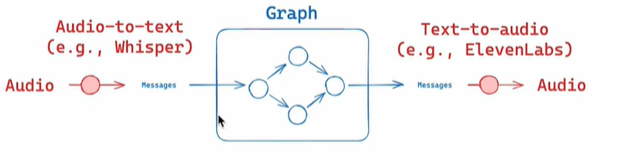




<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 1 : Creating Listening Node</h3>
</div>

In [46]:
import io
import threading
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write


def record_audio_until_stop(state: State):

    """Records audio from the microphone until Enter is pressed, then saves it to a .wav file."""
    
    audio_data = []  # List to store audio chunks
    recording = True  # Flag to control recording
    sample_rate = 16000 # (kHz) Adequate for human voice frequency

    def record_audio():
        """Continuously records audio until the recording flag is set to False."""
        nonlocal audio_data, recording
        with sd.InputStream(samplerate=sample_rate, channels=1, dtype='int16') as stream:
            print("Recording your instruction! ... Press Enter to stop recording.")
            while recording:
                audio_chunk, _ = stream.read(1024)  # Read audio data in chunks
                audio_data.append(audio_chunk)

    def stop_recording():
        """Waits for user input to stop the recording."""
        input()  # Wait for Enter key press
        nonlocal recording
        recording = False

    # Start recording in a separate thread
    recording_thread = threading.Thread(target=record_audio)
    recording_thread.start()

    # Start a thread to listen for the Enter key
    stop_thread = threading.Thread(target=stop_recording)
    stop_thread.start()

    # Wait for both threads to complete
    stop_thread.join()
    recording_thread.join()

    # Stack all audio chunks into a single NumPy array and write to file
    audio_data = np.concatenate(audio_data, axis=0)
    
    # Convert to WAV format in-memory
    audio_bytes = io.BytesIO()
    write(audio_bytes, sample_rate, audio_data)  # Use scipy's write function to save to BytesIO
    audio_bytes.seek(0)  # Go to the start of the BytesIO buffer
    audio_bytes.name = "audio.wav" # Set a filename for the in-memory file

    # Transcribe via Whisper
    transcription = client.audio.transcriptions.create(
       model="whisper-1", 
       file=audio_bytes,
       language="ar"
    )

    # Print the transcription
    print("Here is the transcription:", transcription.text)

    # Write to messages 
    return {"messages": [HumanMessage(content=transcription.text)]}



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 2 : Creating playing NodeStep 2 : Creating playing Node</h3>
</div>

In [ ]:
!pip install elevenlabs

In [48]:
_set_env("ELEVENLABS_API_KEY")

In [49]:
from elevenlabs import play, VoiceSettings
from elevenlabs.client import ElevenLabs

elevenlabs_client = ElevenLabs(api_key=os.getenv("ELEVENLABS_API_KEY"))

def play_audio(state: State):
    
    """Plays the audio response from the remote graph with ElevenLabs."""

    # Response from the agent 
    response = state['messages'][-1]

    # Prepare text by replacing ** with empty strings
    # These can cause unexpected behavior in ElevenLabs
    cleaned_text = response.content.replace("**", "")
    

    # Call text_to_speech API with turbo model for low latency
    response = elevenlabs_client.text_to_speech.convert(
        voice_id="pNInz6obpgDQGcFmaJgB", # Adam pre-made voice
        output_format="mp3_22050_32",
        text=cleaned_text,
        model_id="eleven_turbo_v2_5", 
        voice_settings=VoiceSettings(
            stability=0.0,
            similarity_boost=1.0,
            style=0.0,
            use_speaker_boost=True,
        ),
    )
    
    # Play the audio back
    play(response)


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 3 : Adding it to our chatbot</h3>
</div>

In [50]:
from langgraph.checkpoint.memory import MemorySaver
from typing_extensions import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from langgraph.prebuilt import ToolNode, tools_condition # ------

# Custom route now as we are not goint to end directly we need voice to go as an output first
def route_tools(state: State):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "audio_output"

# Memory saver for state management
memory = MemorySaver()

# Define the state structure
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
# Create the state graph
graph_builder = StateGraph(State)

# intialize llm we are going to use to be our chatbot
llm = ChatOpenAI(model="gpt-4o", api_key=os.environ.get("OpenAi_Key"))
# Adding tools to the list
tools = [search_tool, evaluate_expression,retriever_tool]
# Bind tools to the LLM
llm_with_tools = llm.bind_tools(tools)

# Define the chatbot function
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("audio_input", record_audio_until_stop) # added new node
graph_builder.add_node("chatbot", chatbot)
tools_node = ToolNode(tools)
graph_builder.add_node("tools", tools_node)
graph_builder.add_node("audio_output", play_audio)

# Define the edges in the graph
graph_builder.add_edge(START, "audio_input")
graph_builder.add_edge("audio_input", "chatbot")
# ----
graph_builder.add_conditional_edges("chatbot", route_tools,{"tools": "tools", "audio_output": "audio_output"},)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("audio_output",END)

# Compile the graph
graph = graph_builder.compile(checkpointer=memory)



<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 4 : Visualization to our chatbot</h3>
</div>

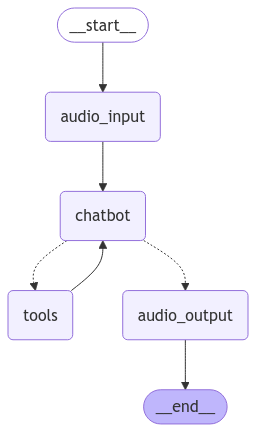

In [51]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


<div id="step1" style="font-family: Arial, sans-serif; padding: 15px; background: linear-gradient(90deg, #f0e68c, #ffd700); color: #333; border: 2px solid #ffa500; border-radius: 8px; margin: 10px 0;">
    <h3 style="margin: 0;">Step 5 : Testing our Chatbot</h3>
</div>

In [52]:
import uuid
thread_id = str(uuid.uuid4())

In [ ]:
# Set user ID for storing memories
config = {"configurable": {"user_id": "Test-Audio-UX", "thread_id": thread_id}}
# Kick off the graph, which will record user input until the user presses Enter
for chunk in graph.stream({"messages":HumanMessage(content="Follow the user's instructions:")}, stream_mode="values", config=config):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Follow the user's instructions:
Recording your instruction! ... Press Enter to stop recording.
Here is the transcription: tell me about this song lyrics please
================================ Human Message =================================

tell me about this song lyrics please
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_LzHL7c6KwMCJpliIUDQEgfTQ)
 Call ID: call_LzHL7c6KwMCJpliIUDQEgfTQ
  Args:
    query: Man's Not Hot lyrics
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.youtube.com/watch?v=2PjNsPMKqSA", "content": "Big Shaq - Man's Not Hot Lyrics"}, {"url": "https://genius.com/Big-shaq-mans-not-hot-mc-mix-lyrics", "content": "[Chorus: Big Shaq] I tell her man's not hot (never hot) I tell her man's not hot (never hot) The girl told m


### Part 7 : Coming Soon (Vision RAG)

<img src='Colpali.jpg'>